# Pathway visualization

In [1]:
import pandas as pd
import pickle
import cobra
from BFAIR.mfa.INCA import INCA_reimport
from BFAIR.mfa.utils import (
    calculate_split_ratio,
    plot_split_ratio,
    get_observable_fluxes,
    percent_observable_fluxes,
    get_flux_precision,
)
from BFAIR.mfa.visualization import (
    reshape_fluxes_escher,
    sampled_fluxes_minrange,
    show_reactions,
    plot_sampled_reaction_fluxes,
    plot_all_subsystem_fluxes,
    get_subsytem_reactions,
    show_subsystems,
    plot_subsystem_fluxes,
)

Determination of memory status is not supported on this 
 platform, measuring for memoryleaks will never fail


The following steps are detailed in the notebooks `MFA_compatibility` and `MFA_feasibility_and_sampling`.

In [2]:
fittedFluxes = pd.read_pickle("data/MFA_sampling/preprocessed_fittedFluxes.obj")

In [3]:
model = cobra.io.load_json_model("data/MFA_sampling/preprocessed_model.json")

Academic license - for non-commercial use only - expires 2021-07-30
Using license file /Users/matmat/gurobi.lic


In [4]:
relaxed_sampled_fluxes = pd.read_pickle("data/MFA_sampling/relaxed_sampled_fluxes.obj")

## Investigate the sampled fluxes

A few plots of the distribution of points per reaction to visually inspect how gaussian the sample distributions are. In rare cases, bimodal distributions can be found

#### Sampled value distributions per reaction

First, print all the subsystems included in the metabolic model that is being used

In [5]:
show_subsystems(model)

0: Extracellular exchange
1: Intracellular demand
2: Biomass and maintenance functions
3: Transport, Inner Membrane
4: Transport, Outer Membrane Porin
5: Transport, Outer Membrane
6: Nucleotide Salvage Pathway
7: Glycerophospholipid Metabolism
8: Alternate Carbon Metabolism
9: Cofactor and Prosthetic Group Biosynthesis
10: Cell Envelope Biosynthesis
11: Methylglyoxal Metabolism
12: Arginine and Proline Metabolism
13: Membrane Lipid Metabolism
14: Pyruvate Metabolism
15: Tyrosine, Tryptophan, and Phenylalanine Metabolism
16: Murein Recycling
17: Valine, Leucine, and Isoleucine Metabolism
18: Nitrogen Metabolism
19: Lipopolysaccharide Biosynthesis / Recycling
20: Unassigned
21: Citric Acid Cycle
22: Inorganic Ion Transport and Metabolism
23: Methionine Metabolism
24: Purine and Pyrimidine Biosynthesis
25: Alanine and Aspartate Metabolism
26: tRNA Charging
27: Cysteine Metabolism
28: Threonine and Lysine Metabolism
29: Histidine Metabolism
30: Oxidative Phosphorylation
31: Glycine and Ser

Let's also have a look at the reaction in one of the subsystems. Here we use the Pyruvate Metabolism as an example

In [6]:
reactions, _ = get_subsytem_reactions(model, 14)

In [7]:
show_reactions(reactions)

0: ACALD
1: ACKr
2: ACS
3: ALCD2x
4: FHL
5: LDH_D
6: OAADC
7: PFL
8: POR5
9: PTAr
10: PTAr_reverse
11: ACKr_reverse
12: ACS_reverse


Here are some plotting methods to better understand what we just created. These plots include a check for normal distributions; if the sampled fluxes for a reaction are normal distributed, we see a green histogram with a kernel density distribution in red. If they are not then the colors are inverted. Here are some examples:

Reaction with normally distributed sampled fluxes:

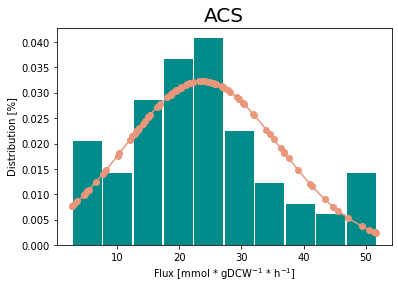

In [8]:
plot_sampled_reaction_fluxes(relaxed_sampled_fluxes, reactions, reaction_id=2)

No normal distribution:

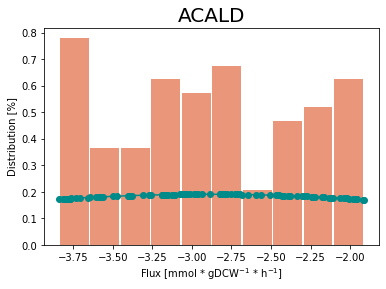

In [9]:
plot_sampled_reaction_fluxes(relaxed_sampled_fluxes, reactions, reaction_id=0)

We can also produce a summary plot for all the sampled reactions in a selected subsystem:

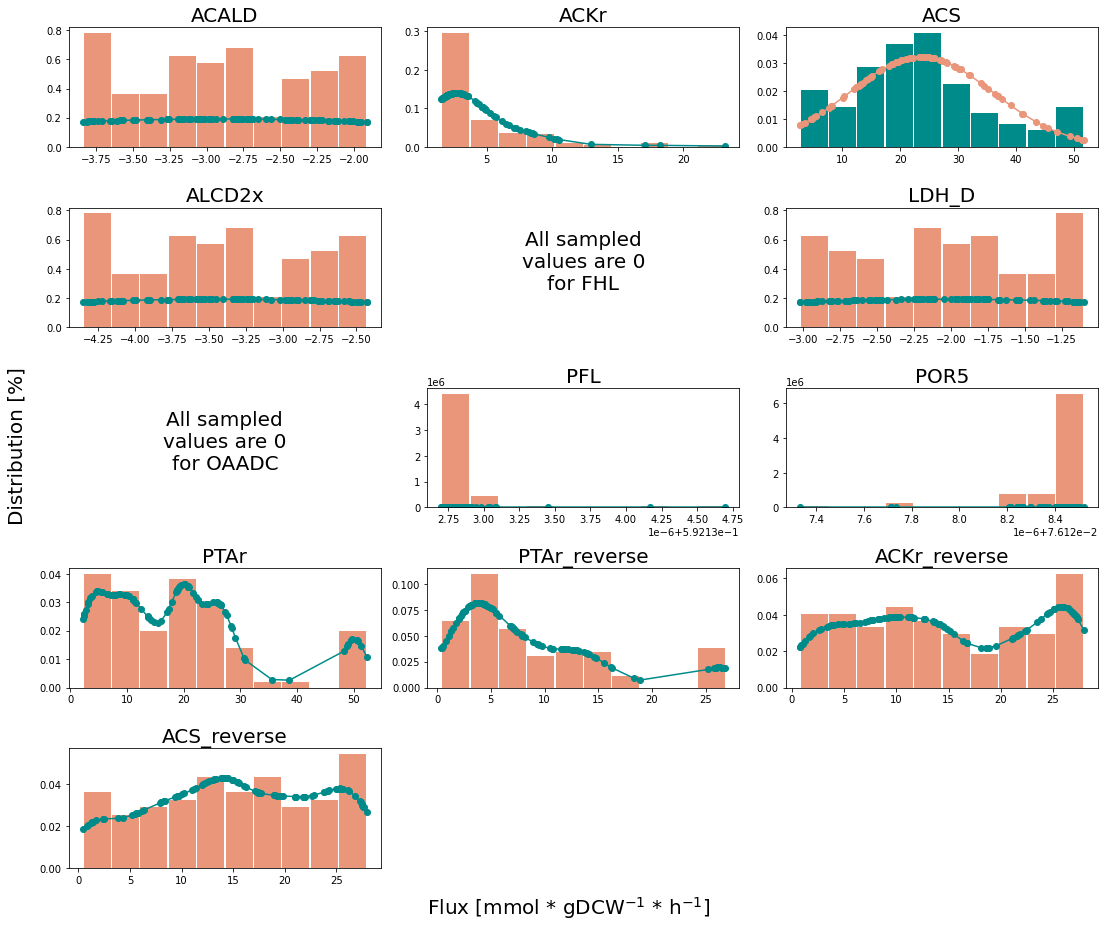

In [10]:
_ = plot_all_subsystem_fluxes(relaxed_sampled_fluxes, reactions, bins=10)

#### Box plots for several reactions of interest to visualize the distribution of points

This is a different way to have a look at the distributions of sampled values for a selected subsystem

In [11]:
show_subsystems(model)

0: Extracellular exchange
1: Intracellular demand
2: Biomass and maintenance functions
3: Transport, Inner Membrane
4: Transport, Outer Membrane Porin
5: Transport, Outer Membrane
6: Nucleotide Salvage Pathway
7: Glycerophospholipid Metabolism
8: Alternate Carbon Metabolism
9: Cofactor and Prosthetic Group Biosynthesis
10: Cell Envelope Biosynthesis
11: Methylglyoxal Metabolism
12: Arginine and Proline Metabolism
13: Membrane Lipid Metabolism
14: Pyruvate Metabolism
15: Tyrosine, Tryptophan, and Phenylalanine Metabolism
16: Murein Recycling
17: Valine, Leucine, and Isoleucine Metabolism
18: Nitrogen Metabolism
19: Lipopolysaccharide Biosynthesis / Recycling
20: Unassigned
21: Citric Acid Cycle
22: Inorganic Ion Transport and Metabolism
23: Methionine Metabolism
24: Purine and Pyrimidine Biosynthesis
25: Alanine and Aspartate Metabolism
26: tRNA Charging
27: Cysteine Metabolism
28: Threonine and Lysine Metabolism
29: Histidine Metabolism
30: Oxidative Phosphorylation
31: Glycine and Ser

We can exclude some reactions if their sampled fluxes are very small in order not to crowd the plot. Here we exclude every reaction whose max value does not exceed 1 and whose min value does not go below -1

In [12]:
reduced_relaxed_sampled_fluxes = sampled_fluxes_minrange(relaxed_sampled_fluxes, min_val=-1, max_val=1)

In [13]:
reduced_relaxed_sampled_fluxes

,EX_co2_e,EX_glc__D_e,EX_h_e,EX_h2o_e,EX_ac_e,EX_lac__D_e,EX_nh4_e,EX_o2_e,EX_etoh_e,ABUTt2pp,...,ACONTa_reverse,FUM_reverse,GAPD_reverse,ICDHyr_reverse,PGM_reverse,PTAr_reverse,ACONTb_reverse,PGK_reverse,ACKr_reverse,ACS_reverse
0,13.543237,-10.0,10.953104,28.789643,2.3,2.215748,-7.560577,-8.810505,3.237696,465.714553,...,16.367512,8.367700,4.072338,2.371525,22.201158,4.986488,16.870859,23.245243,26.410573,14.852405
1,13.942223,-10.0,10.554119,28.789580,2.3,1.816636,-7.560577,-8.810505,3.636745,427.225266,...,22.920790,13.203244,9.455891,9.111397,21.735601,4.842415,25.150167,23.181246,13.659831,20.950423
2,14.011655,-10.0,10.484687,28.789676,2.3,1.747395,-7.560577,-8.810505,3.706081,559.450009,...,15.204975,9.995851,4.136965,11.608163,22.235026,12.156031,17.390690,23.249894,21.592494,14.942728
3,13.202258,-10.0,11.294084,28.789536,2.3,2.556513,-7.560577,-8.810505,2.896824,616.914400,...,21.907680,5.826934,3.935700,3.257740,21.459601,2.889205,21.762006,23.143307,18.602788,21.085737
4,13.325906,-10.0,11.170436,28.789660,2.3,2.433111,-7.560577,-8.810505,3.020349,178.689373,...,11.184041,7.140398,5.356585,6.182290,21.997845,3.832498,10.953312,23.217287,9.294117,9.636500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,14.612671,-10.0,9.883671,28.789480,2.3,1.145987,-7.560577,-8.810505,4.307293,27.590698,...,27.182617,27.755076,22.768438,26.011132,29.612248,26.707553,27.086390,24.264196,26.035236,1.250572
96,14.589870,-10.0,9.906472,28.789480,2.3,1.168787,-7.560577,-8.810505,4.284492,3.380870,...,26.251317,27.346056,22.392033,25.431437,29.521050,25.816474,26.211918,24.251656,24.429541,1.430741
97,14.589661,-10.0,9.906680,28.789493,2.3,1.169023,-7.560577,-8.810505,4.284270,19.452563,...,25.911706,26.529107,21.936295,24.823842,29.639972,26.295611,25.981870,24.268005,25.094538,0.893650
98,14.584237,-10.0,9.912105,28.789489,2.3,1.174440,-7.560577,-8.810505,4.278850,27.401631,...,26.178008,26.791359,21.737854,24.645933,29.583094,26.034856,26.227460,24.260185,25.131312,1.352205


Here is the pyruvate metabolism as an example

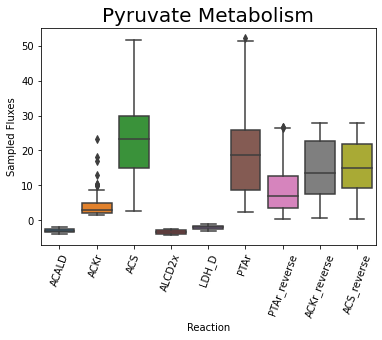

In [14]:
plot_subsystem_fluxes(model, reduced_relaxed_sampled_fluxes, subsystem_id=14, no_zero_cols=True)

#### Calculating the flux splits at key branch points

One important piece of information that can be extracted from calculated fluxes are the flux splits at branching points (e.g., glycolysis vs. PPP, TCA vs. acetate secretion, glyoxylate shunt vs. full TCA, etc.). This will provide information about which of the optional pathways branching off of a given intermediate will carry a higher flux that potentially interferes with a mapped out production strategy. Escher Maps as seen above can be used in order to identify the reactions leading to- and branching off these intermediates. Here we present the following splits as examples:

- Glycolysis/PPP: `EX_glc__D` compared to `PGI` and `G6PDH2r`
- Glyoxylate shunt/full TCA: `ACONTb` compared to `ICDHyr` and `ICL`
- TCA/acetate secretion: (`ACALD`, `PFL`, `PDH`) compared to `PTAr` and `CS`

These fluxes can either be single fluxes, selected by their IDs (see the first two examples) or a combination of multiple fluxes (see last example)

,Mean,Stdev
EX_glc__D_e/G6PDH2r,0.474611,0.000004
EX_glc__D_e/PGI,0.435667,0.068342


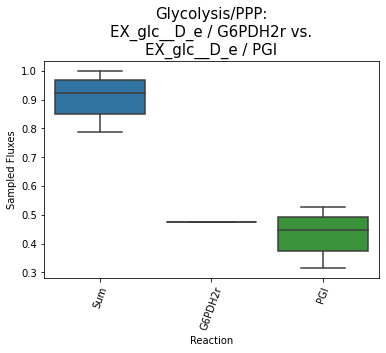

In [15]:
plot_split_ratio(relaxed_sampled_fluxes, 'EX_glc__D_e', 'G6PDH2r', 'PGI', branch_point_name="Glycolysis/PPP")
calculate_split_ratio(relaxed_sampled_fluxes, 'EX_glc__D_e', 'G6PDH2r', 'PGI', branch_point_name="Glycolysis/PPP")

,Mean,Stdev
ACONTb/ICDHyr,5.325006e-01,2.710899e-01
ACONTb/ICL,7.186864e-09,2.245143e-08


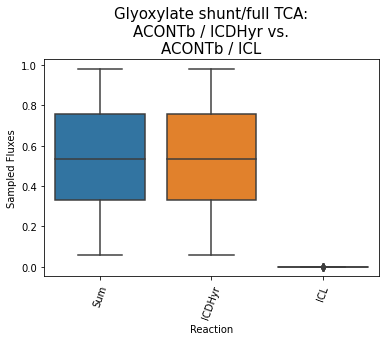

In [16]:
plot_split_ratio(relaxed_sampled_fluxes, 'ACONTb', 'ICDHyr', 'ICL', branch_point_name="Glyoxylate shunt/full TCA")
calculate_split_ratio(relaxed_sampled_fluxes, 'ACONTb', 'ICDHyr', 'ICL', branch_point_name="Glyoxylate shunt/full TCA")

,Mean,Stdev
Glycolysis/PTAr,1.634627,1.035903
Glycolysis/CS,0.120737,0.012378


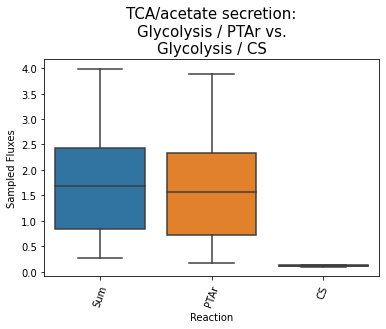

In [17]:
glycolysis = abs(relaxed_sampled_fluxes['ACALD']) + abs(relaxed_sampled_fluxes['PFL']) + abs(relaxed_sampled_fluxes['PDH'])
glycolysis.name = 'Glycolysis'
plot_split_ratio(relaxed_sampled_fluxes, glycolysis, 'PTAr', 'CS', branch_point_name="TCA/acetate secretion")
calculate_split_ratio(relaxed_sampled_fluxes, glycolysis, 'PTAr', 'CS', branch_point_name="TCA/acetate secretion")

#### Calculating the flux resolution

First we want to calculate which fluxes qualify as "observable fluxes", i.e. flux value at least 4 times the confidence interval and 0 not included in the confidence interval.

In [18]:
relaxed_sampled_fluxes

,EX_cm_e,EX_cmp_e,EX_co2_e,EX_cobalt2_e,DM_4crsol_c,DM_5drib_c,DM_aacald_c,DM_amob_c,DM_mththf_c,EX_colipa_e,...,ACONTa_reverse,FUM_reverse,GAPD_reverse,ICDHyr_reverse,PGM_reverse,PTAr_reverse,ACONTb_reverse,PGK_reverse,ACKr_reverse,ACS_reverse
0,0.0,0.0,13.543237,-0.000017,0.000156,0.000158,0.0,0.000001,0.000314,1.101114e-12,...,16.367512,8.367700,4.072338,2.371525,22.201158,4.986488,16.870859,23.245243,26.410573,14.852405
1,0.0,0.0,13.942223,-0.000017,0.000156,0.000157,0.0,0.000001,0.000314,4.395397e-13,...,22.920790,13.203244,9.455891,9.111397,21.735601,4.842415,25.150167,23.181246,13.659831,20.950423
2,0.0,0.0,14.011655,-0.000017,0.000156,0.000157,0.0,0.000001,0.000314,3.478425e-12,...,15.204975,9.995851,4.136965,11.608163,22.235026,12.156031,17.390690,23.249894,21.592494,14.942728
3,0.0,0.0,13.202258,-0.000018,0.000156,0.000158,0.0,0.000001,0.000314,-5.376288e-13,...,21.907680,5.826934,3.935700,3.257740,21.459601,2.889205,21.762006,23.143307,18.602788,21.085737
4,0.0,0.0,13.325906,-0.000017,0.000156,0.000157,0.0,0.000001,0.000314,1.317730e-12,...,11.184041,7.140398,5.356585,6.182290,21.997845,3.832498,10.953312,23.217287,9.294117,9.636500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.0,0.0,14.612671,-0.000017,0.000156,0.000157,0.0,0.000001,0.000314,1.797798e-12,...,27.182617,27.755076,22.768438,26.011132,29.612248,26.707553,27.086390,24.264196,26.035236,1.250572
96,0.0,0.0,14.589870,-0.000017,0.000156,0.000157,0.0,0.000001,0.000314,2.048300e-12,...,26.251317,27.346056,22.392033,25.431437,29.521050,25.816474,26.211918,24.251656,24.429541,1.430741
97,0.0,0.0,14.589661,-0.000017,0.000156,0.000157,0.0,0.000001,0.000314,1.702788e-12,...,25.911706,26.529107,21.936295,24.823842,29.639972,26.295611,25.981870,24.268005,25.094538,0.893650
98,0.0,0.0,14.584237,-0.000017,0.000156,0.000158,0.0,0.000001,0.000314,1.669795e-12,...,26.178008,26.791359,21.737854,24.645933,29.583094,26.034856,26.227460,24.260185,25.131312,1.352205


In [19]:
observable_fluxes = get_observable_fluxes(fittedFluxes)

In [20]:
observable_fluxes

,index,simulation_id,simulation_dateAndTime,rxn_id,flux,flux_stdev,flux_lb,flux_ub,flux_units,fit_alf,fit_chi2s,fit_cor,fit_cov,free,used_,comment_
0,0,WTEColi_113C80_U13C20_01,2021-04-16 18:29:37,26dap_DASH_MSYN,0.229504,0.002608,0.224392,0.234616,mmol*gDCW-1*hr-1,0.05,None,None,None,False,True,None
4,4,WTEColi_113C80_U13C20_01,2021-04-16 18:29:37,ALATA_L,0.343552,0.003904,0.335900,0.351204,mmol*gDCW-1*hr-1,0.05,None,None,None,False,True,None
5,5,WTEColi_113C80_U13C20_01,2021-04-16 18:29:37,ArgSYN,0.197824,0.002248,0.193418,0.202230,mmol*gDCW-1*hr-1,0.05,None,None,None,False,True,None
6,6,WTEColi_113C80_U13C20_01,2021-04-16 18:29:37,ASNN,0.161216,0.001832,0.157625,0.164807,mmol*gDCW-1*hr-1,0.05,None,None,None,False,True,None
7,7,WTEColi_113C80_U13C20_01,2021-04-16 18:29:37,ASPTA,1.279872,0.014544,1.251366,1.327850,mmol*gDCW-1*hr-1,0.05,None,None,None,False,True,None
10,10,WTEColi_113C80_U13C20_01,2021-04-16 18:29:37,DAPDC,0.229504,0.002608,0.224392,0.234616,mmol*gDCW-1*hr-1,0.05,None,None,None,False,True,None
11,11,WTEColi_113C80_U13C20_01,2021-04-16 18:29:37,BIOMASS_Ec_iJO1366_core_53p95M,0.704000,0.008000,0.688320,0.719680,mmol*gDCW-1*hr-1,0.05,None,None,None,False,True,None
14,14,WTEColi_113C80_U13C20_01,2021-04-16 18:29:37,EX_ac_e,2.130000,0.500000,1.917000,2.343000,mmol*gDCW-1*hr-1,0.05,None,None,None,False,True,None
17,17,WTEColi_113C80_U13C20_01,2021-04-16 18:29:37,EX_glc_e,7.400000,0.200000,7.007922,7.791993,mmol*gDCW-1*hr-1,0.05,None,None,None,False,True,None
18,18,WTEColi_113C80_U13C20_01,2021-04-16 18:29:37,EX_nh4_e,4.901952,0.055704,4.792774,5.011130,mmol*gDCW-1*hr-1,0.05,None,None,None,False,True,None


The following amount of fluxes qualifies as being observable

In [21]:
percent_observable_fluxes(fittedFluxes)

27.72 %


The flux precision is defined as the mean of the standard deviations of the fitted Fluxes

In [22]:
get_flux_precision(fittedFluxes)

0.031311574686820484